# Dehli Air Quality Analysis
### by Jackson Fleege

In [336]:
# Importing packages that will be used throughout the course of this file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

## Background

### About the Dataset
This dataset contains daily records of air pollutant concentrations collected over time, including PM2.5, PM10, NO₂, SO₂, CO, and Ozone. It also logs the Air Quality Index (AQI), along with date (day, month, year) also includes number of holidays and weekday representation. It is ideal for developing models to predict AQI, study pollution patterns, and analyze the effects of temporal or holiday factors on air quality.

In [337]:
# Importing dataset that will be used to draw and collect data so that we can make decisive conclusions
df = pd.read_csv("final_dataset.csv")
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


### Research Question
Is more CO produced on average by the residents and businesses of the Delhi region on weekdays (numbered 1-5 on the table) or weekends (numbered 6-7)?

### Procedure

The data from this table was collected throughout the span of 5 years, 2021 through 2025, measuring the air pollutant concentrations collected over time, including PM2.5, PM10, NO₂, SO₂, CO, and Ozone. For the case of this study, we will only be focusing on the concentrations of CO. 

To accurately measure the difference in concentration of CO between weekdays and weekends, we're going to collect averages on days numbered 1-5 in the "Days" column and 6-7 in the "Days" column to properly account for days Monday-Friday and Saturday-Sunday, respectively. With this data, we're going to plot the distributions to make a decision on the null hypothesis. The null will be tested a significance level of p = .05.

### Null Hypothesis
There is no difference in the proportion of CO emissions over time between the weekdays and weekends by the residents and businesses of the Delhi region.


## Conducting the Comparison of Proportions

Before conducting a statistical analysis on the data, it's important to get a sense of what details the data has to offer so that it can properly be worked with. To start, it's important to assure the data is clean so that a figure can be reached on how many observations there are for each day.

In [338]:
# Getting a sense of the dataset's structure and descriptive infromation
df.info
df.describe()
df['Days'].value_counts()

Days
5    209
6    209
7    209
1    209
2    209
3    208
4    208
Name: count, dtype: int64

Using the info and describe calls, the data can now be properly sorted so that the days can be put into two unique categories: Weekdays and Weekends.

After grabbing the two day types, the respective mean, standard deviation, and variance was calculated; starting with the Weekdays, then Weekends. Finally, both days were combined and printed so that they can be viewed easier and the comparisons can be better drawn.

In [339]:
# Creating the "Weekday" and "Weekend" qualifications 
# so that we can calculate the mean, deviation, and variance of both
df['DayType'] = df['Days'].apply(lambda x: 'Weekday' if x in [1, 2, 3, 4, 5] else 'Weekend')

# Mean, deviation, variation for CO for weekdays
weekday_CO_mean = df[df['DayType'] == 'Weekday']['CO'].mean()
weekday_CO_dev = df[df['DayType'] == 'Weekday']['CO'].std()
weekday_CO_var = df[df['DayType'] == 'Weekday']['CO'].var()

# Mean, deviation, variation for CO for weekends
weekend_CO_mean = df[df['DayType'] == 'Weekend']['CO'].mean()
weekend_CO_dev = df[df['DayType'] == 'Weekdend']['CO'].std()
weekend_CO_var = df[df['DayType'] == 'Weekend']['CO'].var()

# Grouped means, deviation, variance
co_means = df.groupby('DayType')['CO'].mean()
co_dev = df.groupby('DayType')['CO'].std()
co_var = df.groupby('DayType')['CO'].var()

print("\nGrouped Means:")
print(co_means)

print("\nGrouped Standard Deviations:")
print(co_dev)

print("\nGrouped Variances:")
print(co_var)


Grouped Means:
DayType
Weekday    1.028408
Weekend    1.019402
Name: CO, dtype: float64

Grouped Standard Deviations:
DayType
Weekday    0.618021
Weekend    0.584032
Name: CO, dtype: float64

Grouped Variances:
DayType
Weekday    0.381949
Weekend    0.341093
Name: CO, dtype: float64


### or for easier viewing: 

In [340]:
# Creating and displayuing a summary of the data rounded for better viewing
summary_table = pd.DataFrame({
    'Mean CO': [1.028408, 1.019402],
    'Std Dev': [0.618021, 0.584032],
    'Variance': [0.381949, 0.341093]
}, index=['Weekday', 'Weekend'])

# Display the table
display(summary_table.round(3))

,Mean CO,Std Dev,Variance
Weekday,1.028,0.618,0.382
Weekend,1.019,0.584,0.341


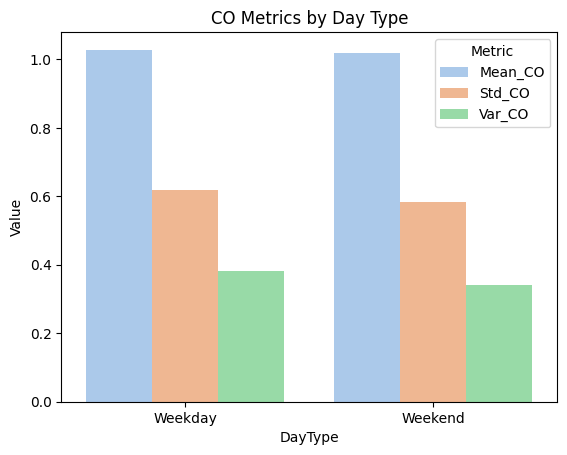

In [341]:
# Plotting the data into a cleaner, organized picture
df_melted = data.melt(id_vars='DayType', var_name='Metric', value_name='Value')

sns.barplot(x='DayType', y='Value', hue='Metric', data=df_melted, palette='pastel')
plt.title("CO Metrics by Day Type")
plt.ylabel("Value")
plt.show()

In [342]:
from scipy.stats import ttest_ind

week_CO = df[df["DayType"] == "Weekday"]["CO"]
weekend_CO = df[df["DayType"] == "Weekend"]["CO"]

t_stat, p_val = ttest_ind(week_CO, weekend_CO, equal_var=False)  # t-test
print("t-statistic:", t_stat)
print("p-value:", p_val)


t-statistic: 0.26194434581649556
p-value: 0.7934309489393148


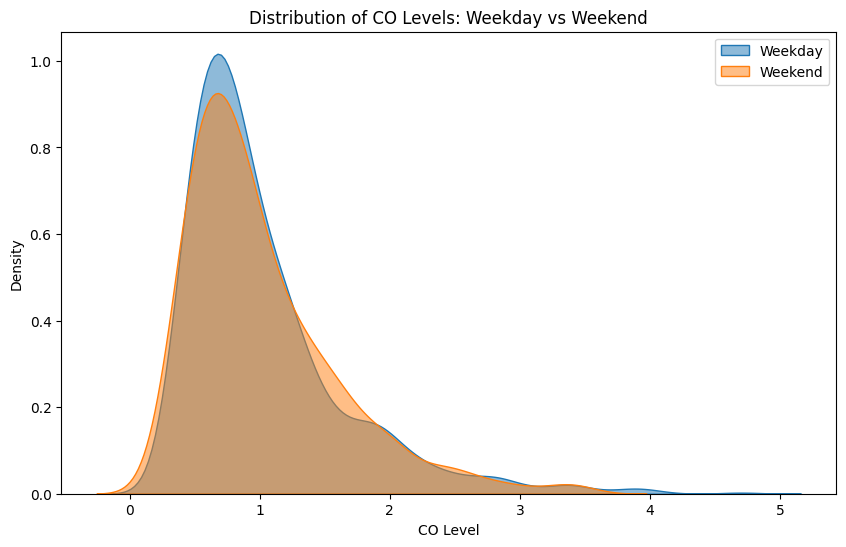

In [343]:
# Setup/formatting
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['DayType'] == 'Weekday'], x='CO', fill=True, label='Weekday', alpha=0.5)
sns.kdeplot(data=df[df['DayType'] == 'Weekend'], x='CO', fill=True, label='Weekend', alpha=0.5)

# Labels for graph
plt.title('Distribution of CO Levels: Weekday vs Weekend')
plt.xlabel('CO Level')
plt.ylabel('Density')
plt.legend()
plt.show()

## Conclusion